# Phase de prétraitement des données

**Importation df clients**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import scipy.stats as st
from scipy.stats import pearsonr
import datetime
customers = pd.read_csv('customers.csv',sep=',')
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [2]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [3]:
print('Nous avons dans notre df','{:,}'.format(len(customers['client_id'].unique())).replace(',',' '),'clients')

Nous avons dans notre df 8 623 clients


**Importation de produits**

In [4]:
products = pd.read_csv('products.csv', sep=',')
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
products[products['price'].isna()]

,id_prod,price,categ


In [6]:
#Combien de catégories de produit nous avons en tout

products['categ'].unique()

array([0, 1, 2], dtype=int64)

In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [8]:
products.describe()
# Problème: nous avons des prix négatifs 

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [9]:
products.loc[products['price']<0]
# Il s'agirait de la catégorie de produit T_0

,id_prod,price,categ
731,T_0,-1.0,0


In [10]:
print('Nous avons dans notre df','{:,}'.format(len(products['id_prod'].unique())).replace(',',' '),'produits')

Nous avons dans notre df 3 287 produits


**Importation df transactions**

In [11]:
transactions = pd.read_csv('transactions.csv')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [12]:
# Il s'avère que le produit qui correspondait à -1€ était un test
transactions.loc[transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [14]:
len(transactions['session_id'].unique())
# A première vue, on pourrait être étonné qu'il n'y ait que la moitié des ID qui ressortent

342316

In [15]:
transactions.loc[transactions['session_id']=='s_325227']
# En fait, les clients peuvent consulter différents produits pendant la même session
# Ici, un client a acheté 4 produits lors de la session s_325227

,id_prod,date,session_id,client_id
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
187463,0_1412,2023-01-11 08:51:55.515020,s_325227,c_4232
404411,0_1380,2023-01-11 08:25:51.777869,s_325227,c_4232
530937,1_653,2023-01-11 08:11:12.250882,s_325227,c_4232


# Fusion des dataframes

In [16]:
df_complet = pd.merge(products, transactions, on='id_prod', how='outer')
df_complet.head()

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298


In [17]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679553 entries, 0 to 679552
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679553 non-null  object 
 1   price       679332 non-null  float64
 2   categ       679332 non-null  float64
 3   date        679532 non-null  object 
 4   session_id  679532 non-null  object 
 5   client_id   679532 non-null  object 
dtypes: float64(2), object(4)
memory usage: 36.3+ MB


In [18]:
df_complet = pd.merge(df_complet, customers, on='client_id',how='inner')
df_complet.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991


In [19]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679532 entries, 0 to 679531
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679532 non-null  object 
 1   price       679311 non-null  float64
 2   categ       679311 non-null  float64
 3   date        679532 non-null  object 
 4   session_id  679532 non-null  object 
 5   client_id   679532 non-null  object 
 6   sex         679532 non-null  object 
 7   birth       679532 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 46.7+ MB


In [20]:
#Suppression des lignes avec id 'T_O'
df_complet.drop(df_complet.loc[df_complet['price']<0].index, inplace=True)

In [21]:
df_complet

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991
...,...,...,...,...,...,...,...,...
679527,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997
679528,2_101,63.99,2.0,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002
679529,2_101,63.99,2.0,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002
679530,2_101,63.99,2.0,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002


In [22]:
df_complet[df_complet['price'].isna()]
# On les conserve car elles correspondent bien à des transactions qui ont eu lieu

,id_prod,price,categ,date,session_id,client_id,sex,birth
766,0_2245,NaN,NaN,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984
767,0_2245,NaN,NaN,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984
768,0_2245,NaN,NaN,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984
769,0_2245,NaN,NaN,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984
2096,0_2245,NaN,NaN,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986
...,...,...,...,...,...,...,...,...
653180,0_2245,NaN,NaN,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972
653181,0_2245,NaN,NaN,2022-03-17 03:03:12.668129,s_180212,c_1533,m,1972
653182,0_2245,NaN,NaN,2022-09-17 03:03:12.668129,s_269223,c_1533,m,1972
653183,0_2245,NaN,NaN,2022-06-17 03:03:12.668129,s_224972,c_1533,m,1972


In [23]:
df_complet[df_complet['categ'].isna()]

,id_prod,price,categ,date,session_id,client_id,sex,birth
766,0_2245,NaN,NaN,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984
767,0_2245,NaN,NaN,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984
768,0_2245,NaN,NaN,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984
769,0_2245,NaN,NaN,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984
2096,0_2245,NaN,NaN,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986
...,...,...,...,...,...,...,...,...
653180,0_2245,NaN,NaN,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972
653181,0_2245,NaN,NaN,2022-03-17 03:03:12.668129,s_180212,c_1533,m,1972
653182,0_2245,NaN,NaN,2022-09-17 03:03:12.668129,s_269223,c_1533,m,1972
653183,0_2245,NaN,NaN,2022-06-17 03:03:12.668129,s_224972,c_1533,m,1972


**Remplacement des NaN par des valeurs intermédiaires**

C:\Users\Nourredine\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


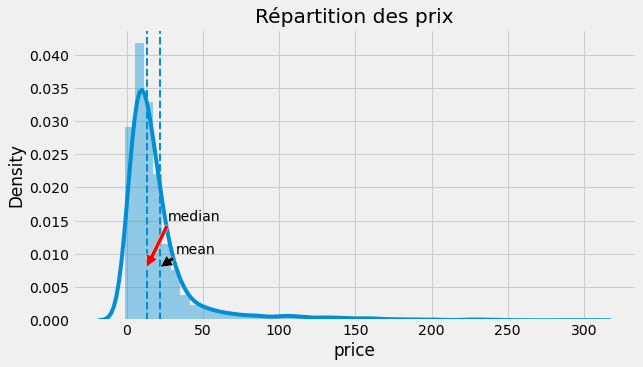

In [24]:
fx,ax=plt.subplots(figsize=(9,5))
sns.distplot(products['price'])
plt.title("Répartition des prix")
# plt.savefig("Cat0Price",bbox_inches='tight') => pour télécharger l'image dans le pc
mean_val = np.mean(products['price'])
median_val = np.median(products['price'])
plt.axvline(mean_val, linestyle='dashed', linewidth=2)
plt.axvline(median_val, linestyle='dashed', linewidth=2)
ax.annotate('mean', xy=(mean_val, 0.008), xytext=(mean_val+10, 0.010),
            arrowprops=dict(facecolor='black'))
ax.annotate('median', xy=(median_val, 0.008), xytext=(median_val+14, 0.015),
            arrowprops=dict(facecolor='red'))
plt.show()
# https://stackoverflow.com/questions/41144357/showing-the-mean-line-in-a-density-plot-in-pandas

In [25]:
# Moyenne
round(np.mean(products['price']),2)

21.86

In [26]:
# Médiane
np.median(products['price'])

13.06

In [27]:
# Remplacement des valeurs nulles par la médiane du total des prix
df_complet['price'].fillna(13.06, inplace=True)
df_complet[df_complet['price']==13.06]

,id_prod,price,categ,date,session_id,client_id,sex,birth
766,0_2245,13.06,NaN,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984
767,0_2245,13.06,NaN,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984
768,0_2245,13.06,NaN,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984
769,0_2245,13.06,NaN,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984
2096,0_2245,13.06,NaN,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986
...,...,...,...,...,...,...,...,...
653182,0_2245,13.06,NaN,2022-09-17 03:03:12.668129,s_269223,c_1533,m,1972
653183,0_2245,13.06,NaN,2022-06-17 03:03:12.668129,s_224972,c_1533,m,1972
654378,0_2228,13.06,0.0,2022-07-05 22:00:40.653682,s_234124,c_8342,f,1978
654379,0_2228,13.06,0.0,2021-05-05 22:00:40.653682,s_30437,c_8342,f,1978


In [28]:
df_complet['categ'].fillna(0, inplace=True)
df_complet[df_complet['categ']==0]

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991
...,...,...,...,...,...,...,...,...
679503,0_1856,9.57,0.0,2022-12-13 23:00:11.780612,s_311618,c_674,m,1960
679504,0_1856,9.57,0.0,2021-11-13 23:00:11.780612,s_119245,c_674,m,1960
679519,0_1931,4.99,0.0,2022-01-06 01:45:15.759634,s_145605,c_1970,m,2002
679520,0_142,19.85,0.0,2022-03-25 18:07:25.880052,s_184472,c_1232,f,1960


In [29]:
df_complet[df_complet['categ']==0].describe()

,price,categ,birth
count,415680.000000,415680.0,415680.000000
mean,10.639476,0.0,1978.102384
std,4.932532,0.0,11.209482
min,0.620000,0.0,1929.000000
25%,6.290000,0.0,1973.000000
50%,9.990000,0.0,1980.000000
75%,14.450000,0.0,1986.000000
max,40.990000,0.0,2004.000000


In [30]:
# Changement du format de la date 
df_complet['date'] = pd.to_datetime(df_complet['date'], dayfirst=True, errors='coerce')
df_complet['date'].dtypes

dtype('<M8[ns]')

# Analyse

**Evolution du chiffre d'affaires dans le temps**

In [31]:
# Calcul du total des prix
print('Le chiffre d\'affaires est de','{:,}'.format(round(df_complet['price'].sum())).replace(',',' '),'euros')
# https://webdevdesigner.com/q/python-format-string-thousand-separator-with-spaces-93172/

Le chiffre d'affaires est de 11 856 615 euros


In [32]:
# Nombre de jours total sur lequel s'étalent nos ventes
df_complet['date'].max() - df_complet['date'].min()

Timedelta('729 days 23:57:22.949617')

**Préambule chiffre-d'affaires dans le temps**

In [33]:
# Extraction de la date en jour, mois, année
df_complet['Year']= df_complet['date'].dt.strftime('%Y')
df_complet['Month']= df_complet['date'].dt.strftime('%m')
df_complet['Day']= df_complet['date'].dt.strftime('%d')
df_complet.head()
# https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas

,id_prod,price,categ,date,session_id,client_id,sex,birth,Year,Month,Day
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,2022,02,20
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,2022,10,20
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,2021,10,09
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,2021,04,28
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,2021,07,15


In [34]:
CA_mois = df_complet.groupby(['Year','Month'])[['price']].sum()
CA_mois

price
Year Month           
2021 03     482558.15
     04     476292.14
     05     493047.95
     06     484179.98
     07     482887.64
     08     482402.33
     09     507397.40
     10     320890.16
     11     516298.33
     12     526008.70
2022 01     525404.29
     02     535715.16
     03     515600.19
     04     493181.78
     05     517341.56
     06     496107.54
     07     510939.84
     08     506571.75
     09     494232.07
     10     508048.37
     11     496808.60
     12     510297.86
2023 01     517631.97
     02     456771.18

<Figure size 1224x360 with 0 Axes>

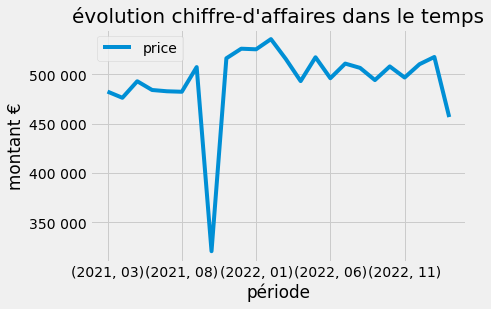

In [35]:
plt.figure(figsize=(17,5))
CA_mois.plot()
plt.xlabel("période")
plt.ylabel("montant €")
plt.grid(True)
plt.title("évolution chiffre-d'affaires dans le temps", fontsize=20)
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html
# Le CA d'oct 2021 est anormalement bas
# J'aimerais inclure plus de périodes dans les abscisses
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)).replace(",", " ")))
# Pour l'espace entre les chiffres dans l'axe des ordonnées
# https://stackoverflow.com/questions/25973581/how-do-i-format-axis-number-format-to-thousands-with-a-comma-in-matplotlib
# https://stackoverflow.com/questions/69525296/how-do-i-format-axis-number-format-to-thousands-with-a-whitespace-in-matplotlib

In [36]:
# On zoome sur le mois d'octobre pour tenter d'expliquer cette baisse
df_filtre = df_complet[(df_complet['Year']=='2021') & (df_complet['Month']=='10')]
df_filtre
# https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns

,id_prod,price,categ,date,session_id,client_id,sex,birth,Year,Month,Day
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,2021,10,09
16,0_2190,8.22,0.0,2021-10-01 09:05:45.175758,s_98342,c_6389,f,1991,2021,10,01
17,0_1110,4.71,0.0,2021-10-22 09:29:53.047504,s_108431,c_6389,f,1991,2021,10,22
29,0_1340,14.76,0.0,2021-10-11 16:25:47.279673,s_103302,c_6389,f,1991,2021,10,11
47,0_1412,11.73,0.0,2021-10-01 22:30:39.774102,s_98626,c_6389,f,1991,2021,10,01
...,...,...,...,...,...,...,...,...,...,...,...
679386,0_1487,4.99,0.0,2021-10-17 05:11:05.883272,s_105969,c_8520,m,1999,2021,10,17
679432,2_227,50.99,2.0,2021-10-27 05:44:44.614166,s_110754,c_3643,f,2003,2021,10,27
679442,2_227,50.99,2.0,2021-10-06 08:48:15.644308,s_100763,c_3516,f,1992,2021,10,06
679464,0_2075,8.99,0.0,2021-10-09 09:03:48.268536,s_102200,c_2793,m,1933,2021,10,09


La réponse pourrait se trouver dans les catégories

**Zoom sur les catégories & références**

***Catégories***

In [37]:
df_complet['categ'].value_counts()

0.0    415680
1.0    227169
2.0     36483
Name: categ, dtype: int64

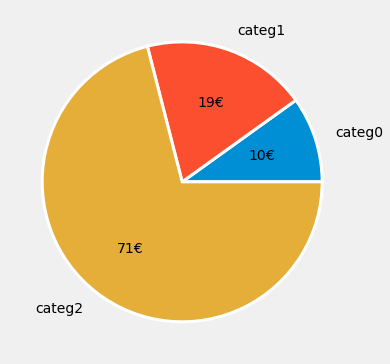

In [38]:
# Répartition de la moyenne de prix par catégorie
pcat0 = df_complet.loc[df_complet['categ']==0]['price'].mean()
pcat1 = df_complet.loc[df_complet['categ']==1]['price'].mean()
pcat2 = df_complet.loc[df_complet['categ']==2]['price'].mean()

values = [pcat0,pcat1,pcat2]
names = ['categ0','categ1','categ2']

plt.figure(figsize=(7,6))
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops= {'linewidth' : 3, 'edgecolor' : 'white'}, autopct = lambda x: str(round(x))+ '€')
plt.show()

Représentation chiffre-d'affaires généré par catégorie en pourcentage

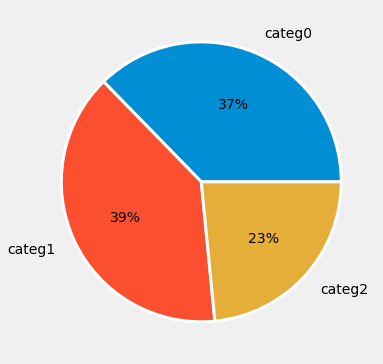

In [39]:
pcat0 = df_complet.loc[df_complet['categ']==0]['price'].sum() / df_complet['price'].sum()*100
pcat1 = df_complet.loc[df_complet['categ']==1]['price'].sum() / df_complet['price'].sum()*100
pcat2 = df_complet.loc[df_complet['categ']==2]['price'].sum() / df_complet['price'].sum()*100

values = [pcat0,pcat1,pcat2]
names = ['categ0','categ1','categ2']

plt.figure(figsize=(7,6))
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops= {'linewidth' : 3, 'edgecolor' : 'white'}, autopct = lambda x: str(round(x))+ '%')
plt.show()

In [40]:
CA_categ = df_complet.groupby(['categ','Year'])[['price']].sum()
CA_categ

price
categ Year            
0.0   2021  1884156.67
      2022  2194537.66
      2023   343922.90
1.0   2021  1777995.85
      2022  2485275.19
      2023   390451.65
2.0   2021  1109810.26
      2022  1430436.16
      2023   240028.60

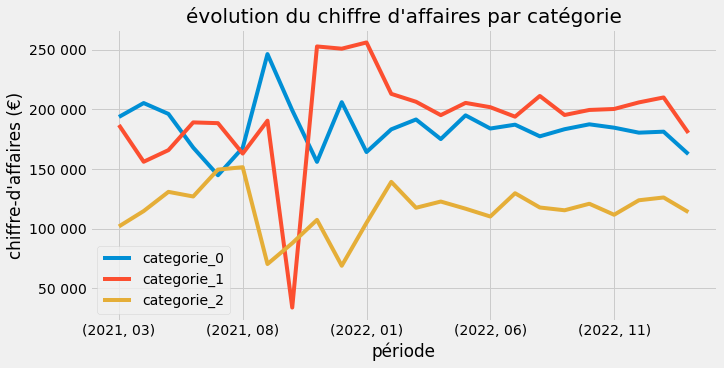

In [41]:
# Evolution dans le temps des ventes par catégorie en termes de chiffre-d'affaires :
plt.figure(figsize=(10,5))
df_complet[df_complet['categ']==0].groupby(['Year','Month'])['price'].sum().plot(legend=True, label="categorie_0")
df_complet[df_complet['categ']==1].groupby(['Year','Month'])['price'].sum().plot(legend=True, label="categorie_1")
df_complet[df_complet['categ']==2].groupby(['Year','Month'])['price'].sum().plot(legend=True, label="categorie_2")
plt.xlabel('période')
plt.ylabel('chiffre-d\'affaires (€)')
plt.grid(True)
plt.title('évolution du chiffre d\'affaires par catégorie', fontsize=20)
# https://www.actuia.com/tutoriel/tutoriel-dinitiation-a-lia-python-pandas-et-matplotlib-partie-3/
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)).replace(",", " ")))
# https://stackoverflow.com/questions/25973581/how-do-i-format-axis-number-format-to-thousands-with-a-comma-in-matplotlib
# https://stackoverflow.com/questions/69525296/how-do-i-format-axis-number-format-to-thousands-with-a-whitespace-in-matplotlib

**On constate que le principal responsable de cette baisse est le mois d'octobre 2021 de 
la catégorie 1. Il va falloir supprimer ce mois_ci pour cette catégorie 
pour avoir une meilleure représentativité de l'évolution du chiffre-d'affaires **

***Hypothèse de la baisse: la catégorie 1 contient les produits phares de notre gamme de livres. Ainsi, une simple baisse a drastiquement impacté le chiffre-d'affaires sur l'ensemble de la catégorie***

In [42]:
# Suppression mois d'octobre 2021
df_complet.drop(df_filtre.index, inplace=True)
# https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe

In [43]:
print(df_complet)

       id_prod  price  categ                       date session_id client_id  \
0       0_1421  19.99    0.0 2022-02-20 17:04:37.204937   s_168213    c_6389   
1       0_1421  19.99    0.0 2022-10-20 17:04:37.204937   s_285450    c_6389   
3       0_1635  16.99    0.0 2021-04-28 06:08:38.261863    s_26841    c_6389   
4        0_166   1.83    0.0 2021-07-15 10:35:31.526968    s_62585    c_6389   
5        0_166   1.83    0.0 2022-10-15 10:35:31.526968   s_282822    c_6389   
...        ...    ...    ...                        ...        ...       ...   
679527   2_163  68.99    2.0 2022-01-28 16:51:07.389515   s_156517    c_7739   
679528   2_101  63.99    2.0 2021-07-21 09:11:12.619736    s_65192    c_7089   
679529   2_101  63.99    2.0 2022-12-21 09:11:12.619736   s_315267    c_7089   
679530   2_101  63.99    2.0 2022-10-21 09:11:12.619736   s_285788    c_7089   
679531   2_101  63.99    2.0 2022-03-21 09:11:12.619736   s_182240    c_7089   

       sex  birth  Year Month Day  
0  

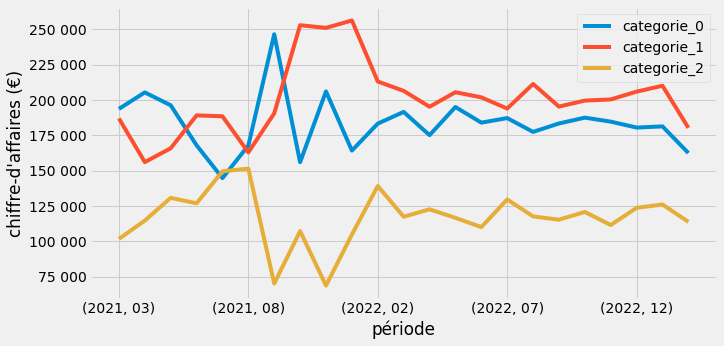

In [44]:
plt.figure(figsize=(10, 5))
df_complet[df_complet['categ']==0].groupby(['Year','Month'])['price'].sum().plot(legend=True, label="categorie_0")
df_complet[df_complet['categ']==1].groupby(['Year','Month'])['price'].sum().plot(legend=True, label="categorie_1")
df_complet[df_complet['categ']==2].groupby(['Year','Month'])['price'].sum().plot(legend=True, label="categorie_2")
plt.xlabel('période')
plt.ylabel('chiffre-d\'affaires (€)')
# J'ai retiré le mois d'octobre 
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)).replace(",", " ")))
# https://stackoverflow.com/questions/25973581/how-do-i-format-axis-number-format-to-thousands-with-a-comma-in-matplotlib
# https://stackoverflow.com/questions/69525296/how-do-i-format-axis-number-format-to-thousands-with-a-whitespace-in-matplotlib

***Références***: top & flop

In [45]:
nb = len(df_complet['id_prod'].unique())
print('Pour rappel, il existe','{:,}'.format(nb).replace(',',' '),'références produit')

Pour rappel, il existe 3 264 références produit


Text(0.5, 1.0, 'Pires Ventes')

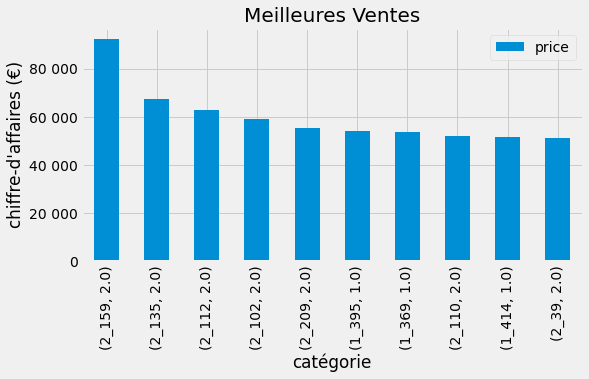

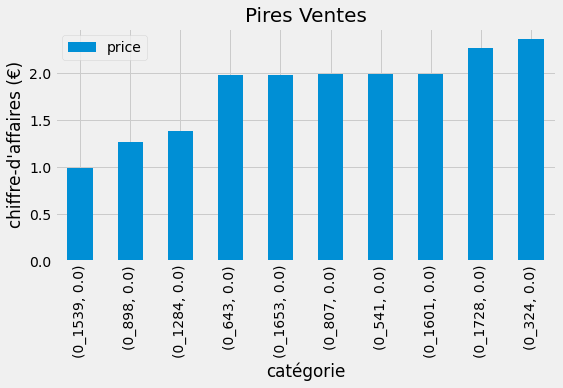

In [46]:
top = df_complet.groupby(['id_prod','categ'])[['price']].sum()
top = top.sort_values(by='price', ascending=False).head(10)
# top.axhline(y = 0, color='black', linewidth=1.3, alpha=.7) #pour opacifier la ligne horizontale
top.plot(kind='bar', figsize=(8,4))
plt.xlabel('catégorie')
plt.ylabel('chiffre-d\'affaires (€)')
#plt.xticks(rotation=45) : pour pivoter titre des abscisses
#plt.tick_params(axis='both', which='major', rotation=45) # vient du module style
plt.title("Meilleures Ventes", fontsize=20)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)).replace(",", " ")))
# https://stackoverflow.com/questions/25973581/how-do-i-format-axis-number-format-to-thousands-with-a-comma-in-matplotlib
# https://stackoverflow.com/questions/69525296/how-do-i-format-axis-number-format-to-thousands-with-a-whitespace-in-matplotlib

# style.use('default') # pour revenir au matplotlib par défaut
flop = df_complet.groupby(['id_prod','categ'])[['price']].sum()
flop = flop.sort_values(by='price', ascending=True).head(10)
flop.plot(kind='bar', figsize=(8,4))
plt.xlabel('catégorie')
plt.ylabel('chiffre-d\'affaires (€)')
# plt.xticks(rotation=45): ibid
plt.title("Pires Ventes", fontsize=20)
# https://www.kaggle.com/residentmario/grouping-and-sorting/tutorial

**Informations clients & répartition du chiffre-d'affaires entre eux**

par sexe

In [47]:
df_complet[['Femmes','Hommes']] = df_complet.pivot(index=None, columns='sex', values='sex')
df_complet

,id_prod,price,categ,date,session_id,client_id,sex,birth,Year,Month,Day,Femmes,Hommes
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,2022,02,20,f,NaN
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,2022,10,20,f,NaN
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,2021,04,28,f,NaN
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,2021,07,15,f,NaN
5,0_166,1.83,0.0,2022-10-15 10:35:31.526968,s_282822,c_6389,f,1991,2022,10,15,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679527,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997,2022,01,28,NaN,m
679528,2_101,63.99,2.0,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002,2021,07,21,NaN,m
679529,2_101,63.99,2.0,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002,2022,12,21,NaN,m
679530,2_101,63.99,2.0,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002,2022,10,21,NaN,m


In [48]:
# Répartition Hommes-Femmes | chiffre-d'affaires
info_cli = df_complet.groupby(['sex'])[['price']].sum()
info_cli

,price
sex,
f,5705857.38
m,5829867.40


Text(0.5, 0, 'Men / Women ratio')

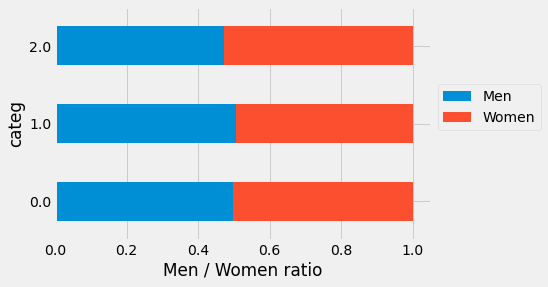

In [49]:
# Ratio Hommes/Femmes
gender_group = df_complet.groupby(['categ','sex']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(['Men', 'Women'], bbox_to_anchor=(1.0, 0.7))
plt.xlabel('Men / Women ratio')
# https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

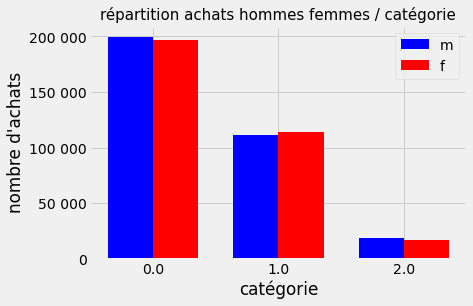

In [50]:
g = df_complet.groupby('sex')
hommes = g.get_group('m')['categ'].value_counts()
femmes = g.get_group('f')['categ'].value_counts()

categories = df_complet['categ'].value_counts().index
gender = df_complet['sex'].value_counts().index
pos = np.arange(len(categories))
width = .36

plt.bar(pos-width/2, hommes ,width, color='blue')
plt.bar(pos+width/2, femmes,width,color='red')
plt.xticks(pos,categories)
plt.xlabel('catégorie')
plt.ylabel('nombre d\'achats')
plt.title('répartition achats hommes femmes / catégorie', fontsize=15)
plt.legend(gender, loc=1)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)).replace(",", " ")))
plt.show()

*Par tranche d'âge*

In [51]:
# On va d'abord changer le format de 'Year'
df_complet[['Year','birth']].dtypes

Year     object
birth     int64
dtype: object

In [52]:
df_complet['Year'] = df_complet['Year'].astype('int64')
# ou pd.to_numeric(df_complet['Year'], errors='coerce')

In [53]:
# Ensuite, on va créer une colonne "âge"
import datetime
df_complet['age'] = df_complet['Year'] - df_complet['birth']
df_complet

,id_prod,price,categ,date,session_id,client_id,sex,birth,Year,Month,Day,Femmes,Hommes,age
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,2022,02,20,f,NaN,31
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,2022,10,20,f,NaN,31
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,2021,04,28,f,NaN,30
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,2021,07,15,f,NaN,30
5,0_166,1.83,0.0,2022-10-15 10:35:31.526968,s_282822,c_6389,f,1991,2022,10,15,f,NaN,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679527,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997,2022,01,28,NaN,m,25
679528,2_101,63.99,2.0,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002,2021,07,21,NaN,m,19
679529,2_101,63.99,2.0,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002,2022,12,21,NaN,m,20
679530,2_101,63.99,2.0,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002,2022,10,21,NaN,m,20


In [54]:
df_complet['age'].describe()

count    657726.000000
mean         43.915957
std          13.628373
min          17.000000
25%          35.000000
50%          42.000000
75%          51.000000
max          94.000000
Name: age, dtype: float64

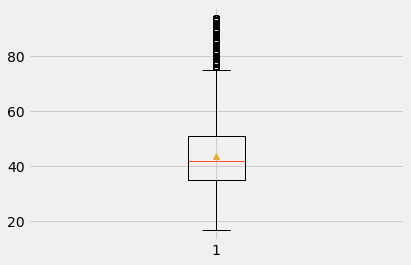

In [55]:
plt.boxplot(df_complet['age'], showmeans=True)
plt.show()

In [56]:
# Ensuite on regroupe par tranche avec "cut":
bins = [17, 30, 40, 50, 60, 70, 120]
labels = ['17-29', '30-39', '40-49', '50-59', '60-69', '70+']

df_complet['tranche_age'] =pd.cut(df_complet['age'], bins=bins, labels = labels, include_lowest = True)
df_complet
# https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas

,id_prod,price,categ,date,session_id,client_id,sex,birth,Year,Month,Day,Femmes,Hommes,age,tranche_age
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,2022,02,20,f,NaN,31,30-39
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,2022,10,20,f,NaN,31,30-39
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,2021,04,28,f,NaN,30,17-29
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,2021,07,15,f,NaN,30,17-29
5,0_166,1.83,0.0,2022-10-15 10:35:31.526968,s_282822,c_6389,f,1991,2022,10,15,f,NaN,31,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679527,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997,2022,01,28,NaN,m,25,17-29
679528,2_101,63.99,2.0,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002,2021,07,21,NaN,m,19,17-29
679529,2_101,63.99,2.0,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002,2022,12,21,NaN,m,20,17-29
679530,2_101,63.99,2.0,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002,2022,10,21,NaN,m,20,17-29


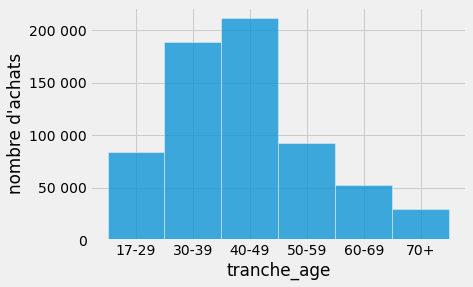

In [57]:
sns.histplot(df_complet['tranche_age'])
plt.ylabel('nombre d\'achats')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)).replace(",", " ")))
# Ce n'est ni une répartition par CA, ni par nombre de clients... C'est une répartition par nombre d'achats
# https://www.python-graph-gallery.com/20-basic-histogram-seaborn

**Appréciation de l'équi-répartition du chiffre-d'affaires par une courbe de Lorenz**

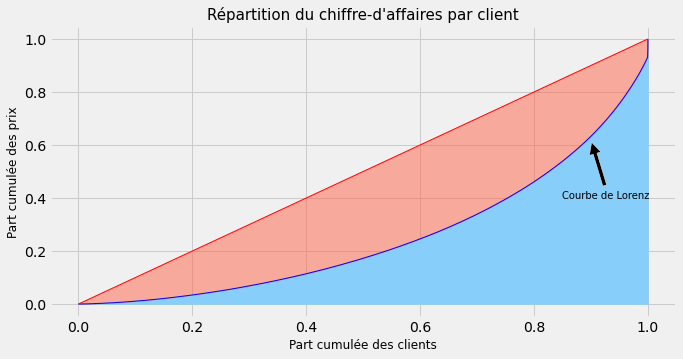

L indice de Gini est de 0.34 , ce qui signifie qu'on a une répartition du chiffre-d'affaires plutôt égalitaire


In [58]:
lorenz = df_complet[['client_id', 'price']]

# Calcul de la courbe de lorenz
lorenz_client = lorenz.groupby('client_id').count()
lorenz_client = lorenz_client.price.values
c = len(lorenz_client)
lorenz_client = np.cumsum(np.sort(lorenz_client)) / lorenz_client.sum()
lorenz_client = np.append([0], lorenz_client)
n = len(df_complet.client_id)

# Affichage de la courbe et de la droite xaxis
xm = np.linspace(0-1/c,1+1/c,c+1)
plt.figure(figsize= (10,5))
plt.grid(True)
plt.plot(xm,lorenz_client, "b", linewidth=1)
plt.fill_between(xm,lorenz_client,0,color='lightskyblue')
plt.plot([0,1], [0,1], "r", linewidth=1)
plt.fill_between(xm, xm, lorenz_client, color='tomato', alpha=0.5)
plt.xlabel('Part cumulée des clients', fontsize = 12)
plt.ylabel('Part cumulée des prix', fontsize = 12)
plt.annotate('Courbe de Lorenz', xy=(0.9, 0.62), xytext=(0.85, 0.4), 
             arrowprops={'facecolor':'black', 'shrink':0.05}, fontsize = 10 )

# Calcul de la mediane
medianc = lorenz_client[int(round(len(lorenz_client)) / 2)]

plt.title('Répartition du chiffre-d\'affaires par client', fontsize = 15)
plt.show()

# Affichage de l'indice GINI

AUC = (lorenz_client.sum() -lorenz_client[-1]/2 -lorenz_client[0]/2)/n # Surface sous la courbe de Lorenz. 
S = medianc - AUC # surface entre la première bissectrice et la courbe de Lorenz
gini = 2*S
print('\33[1mL indice de Gini est de', round((gini),2), ', ce qui signifie qu\'on a une répartition du chiffre-d\'affaires plutôt égalitaire')

# Deuxième partie

**On commence par une vision d'ensemble des corrélations**

<AxesSubplot:title={'center':'Indices de corrélation'}>

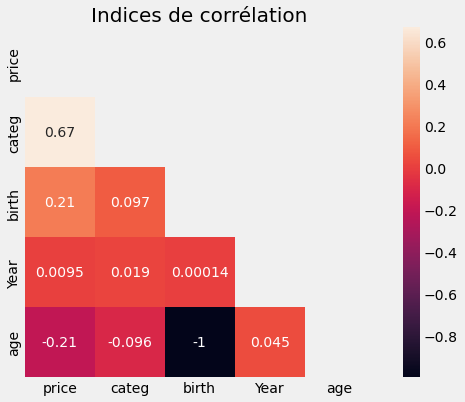

In [59]:
plt.figure(figsize=(9,6))
plt.title('Indices de corrélation', fontsize=20)
mask = np.zeros_like(df_complet.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_complet.corr(), annot=True, mask=mask, square=True)
# On constate une forte corrélation entre la catégorie du bouquin et son prix
# En revanche, on note une faible corrélation entre l'âge du client et la catégorie achetée
# On note une corrélation moyenne entre l'âge du client et le prix du bouqin
# https://www.python-graph-gallery.com/90-heatmaps-with-various-input-format

**Lien entre genre et catégorie achetée**

En nombre d'achats

In [60]:
sex_categ = pd.crosstab(index=df_complet["sex"], columns=df_complet["categ"], margins=True) 
sex_categ.columns = ["categ0","categ1","categ2","total_row"]
sex_categ.index= ["femmes","hommes","total_column"]
sex_categ

,categ0,categ1,categ2,total_row
femmes,197098,114087,16722,327907
hommes,199813,111416,18590,329819
total_column,396911,225503,35312,657726


<AxesSubplot:>

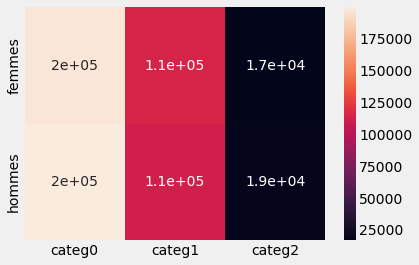

In [61]:
del sex_categ['total_row']
sex_categ.drop("total_column")
sns.heatmap(sex_categ[:2],annot=True)

**Lien entre l'âge des clients et le montant total des achats**

In [62]:
CA_tranche_age = df_complet.groupby('tranche_age')[['price']].sum()
CA_tranche_age

,price
tranche_age,
17-29,3268721.79
30-39,2527762.11
40-49,2815516.59
50-59,1551935.36
60-69,879100.66
70+,492688.27


Text(0, 0.5, "montant d'achats")

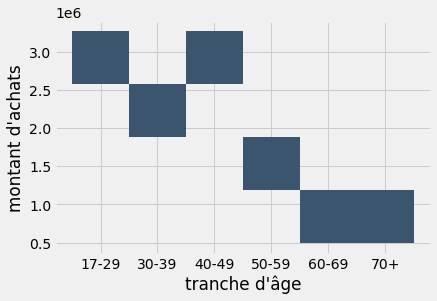

In [63]:
sns.histplot(CA_tranche_age, x='tranche_age',y='price')
plt.xlabel('tranche d\'âge')
plt.ylabel('montant d\'achats')

**Lien entre catégorie et tranche d'âge**

Text(0, 0.5, "montant des achats (en millions d'euros)")

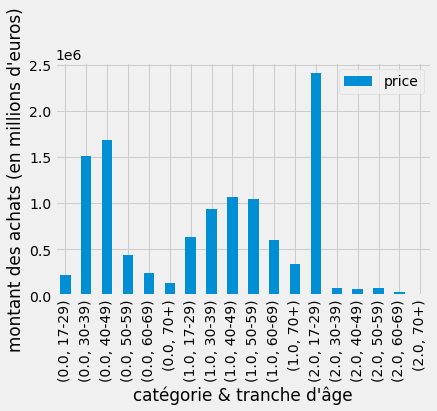

In [64]:
# Rapport
df_complet.groupby(['categ','tranche_age'])[['price']].sum().plot(kind='bar')
plt.xlabel('catégorie & tranche d\'âge')
plt.ylabel('montant des achats (en millions d\'euros)')

Text(0, 0.5, "montant des achats (en millions d'euros)")

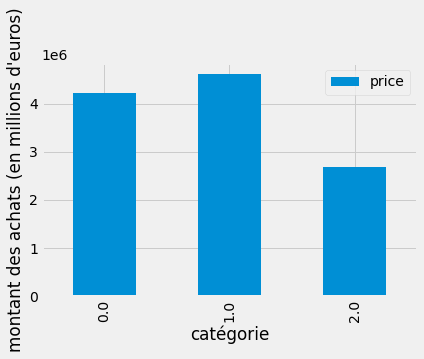

In [65]:
# Rapport
df_complet.groupby(['categ'])[['price']].sum().plot(kind='bar')
plt.xlabel('catégorie')
plt.ylabel('montant des achats (en millions d\'euros)')

**Panier moyen**

In [66]:
# Panier moyen = somme que dépense un client en moyenne
# Si on souhaite le calculer sur une année, il suffit de prendre le chiffre-d'affaires d'une année
# Panier moyen = chiffre-d'affaires total / nombre total de commandes
panier_moyen = round(df_complet['price'].sum() / len(df_complet['session_id']))
print('En moyenne, un client dépense',(panier_moyen),'euros')

En moyenne, un client dépense 18 euros


In [67]:
# Par tranche d'âges
panier_moyen1 = df_complet.groupby('tranche_age')[['price']].sum()
panier_moyen2 = df_complet.groupby('tranche_age')[['session_id']].count()
panier_moyen3 = panier_moyen1['price'] / panier_moyen2['session_id']
panier_moyen1['session_id'] = panier_moyen2['session_id']
panier_moyen1['panier_moyen'] = panier_moyen3
round(panier_moyen1, 2)

,price,session_id,panier_moyen
tranche_age,,,
17-29,3268721.79,83803,39.00
30-39,2527762.11,188571,13.40
40-49,2815516.59,211608,13.31
50-59,1551935.36,92271,16.82
60-69,879100.66,52055,16.89
70+,492688.27,29418,16.75


In [68]:
df_complet['id_prod'].astype('int')

0         1421
1         1421
3         1635
4          166
5          166
          ... 
679527    2163
679528    2101
679529    2101
679530    2101
679531    2101
Name: id_prod, Length: 657726, dtype: int32

In [69]:
# Par tranche d'âges
panier_moyen1 = df_complet.groupby('tranche_age')[['price']].sum()
panier_moyen2 = df_complet.groupby('tranche_age')[['session_id']].count()
panier_moyen3 = panier_moyen1['price'] / panier_moyen2['session_id']
panier_moyen1['session_id'] = panier_moyen2['session_id']
panier_moyen1['panier_moyen'] = panier_moyen3
round(panier_moyen1, 2)

,price,session_id,panier_moyen
tranche_age,,,
17-29,3268721.79,83803,39.00
30-39,2527762.11,188571,13.40
40-49,2815516.59,211608,13.31
50-59,1551935.36,92271,16.82
60-69,879100.66,52055,16.89
70+,492688.27,29418,16.75


Lien entre prix moyen des dépenses et tranche d'âge

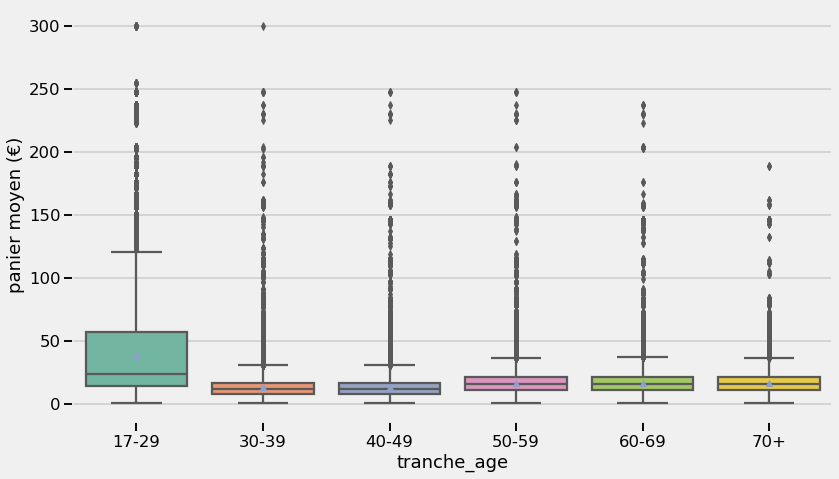

In [85]:
plt.subplots(figsize=(12,7))
ax = sns.boxplot(x="tranche_age", y='price', data= df_complet, showmeans=True)
plt.ylabel('panier moyen (€)')
plt.tight_layout()

In [71]:
df_complet.groupby([df_complet['tranche_age']])[['price']].mean()
# Ici on montre qu'un groupby revient au même que calculer le panier moyen en divisant le CA par le nb de sessions (cf.ci-dessus)

,price
tranche_age,
17-29,39.004830
30-39,13.404830
40-49,13.305341
50-59,16.819319
60-69,16.887920
70+,16.747851


Panier moyen par nombre d'articles (méthode Leïla)

In [72]:
# 1- Création du df "data2_pan_moy" et nommons la variable "taille_panier" en nombre d'articles

pd.set_option('mode.chained_assignment', None)
cols = ['session_id', 'id_prod']
data2_pan_count = df_complet[cols]
data2_pan_count['taille_panier'] = 1
data2_pan_count = data2_pan_count.sort_values('session_id')
data2_pan_count = data2_pan_count.groupby('session_id').sum().reset_index()

cols_2 = ['session_id', 'id_prod', 'client_id','date','age', 'tranche_age']
data2_pan_moy = df_complet[cols_2]
data2_pan_moy = pd.merge(data2_pan_moy, data2_pan_count, on = 'session_id')
data2_pan_count
data2_pan_moy.head()

,session_id,id_prod,client_id,date,age,tranche_age,taille_panier
0,s_168213,0_1421,c_6389,2022-02-20 17:04:37.204937,31,30-39,4
1,s_168213,0_1636,c_6389,2022-02-20 16:58:16.011658,31,30-39,4
2,s_168213,1_593,c_6389,2022-02-20 16:53:12.574677,31,30-39,4
3,s_168213,0_1153,c_6389,2022-02-20 17:29:34.753400,31,30-39,4
4,s_285450,0_1421,c_6389,2022-10-20 17:04:37.204937,31,30-39,4


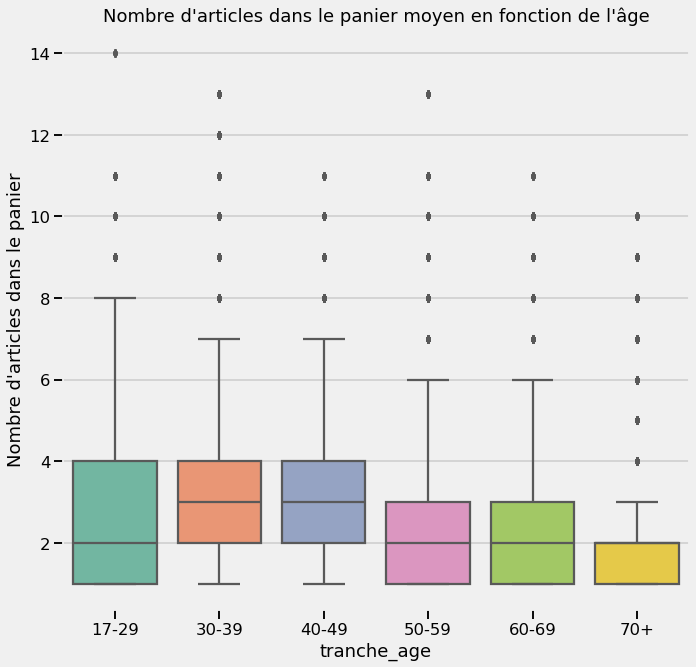

In [73]:
# 2-Créons le graphe en boxplot
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

sns.boxplot(x='tranche_age', y='taille_panier', data=data2_pan_moy)
plt.ylabel('Nombre d\'articles dans le panier')
plt.title('Nombre d\'articles dans le panier moyen en fonction de l\'âge')

plt.savefig('P19_graphic:Nombre d\'articles dans le panier en fonction de l\'âge.png')

plt.show()

**Fréquence d'achat**

In [74]:
# Fréquence d'achat = nombre d'achats réalisé par un client sur une période donnée
# Fréquence d'achat = nombre total de commandes / nombre de clients
# Pour rappel, un achat peut contenir plusieurs produits
frequence_achat = round(len(df_complet['session_id'].unique()) / len(df_complet['client_id'].unique()))
print('un client réalise en moyenne',(frequence_achat),'achats')

un client réalise en moyenne 38 achats


In [75]:
frequence_achat1 = df_complet.groupby(by='tranche_age', as_index=False).agg({'session_id': pd.Series.nunique})
frequence_achat2 = df_complet.groupby(by='tranche_age', as_index=False).agg({'client_id': pd.Series.nunique})
frequence_achat3 = frequence_achat1['session_id'] / frequence_achat2['client_id']
frequence_achat1['client_id'] = frequence_achat2['client_id']
frequence_achat1['frequence_achat'] = frequence_achat3
round(frequence_achat1, 2)

,tranche_age,session_id,client_id,frequence_achat
0,17-29,47263,2410,19.61
1,30-39,78281,1942,40.31
2,40-49,89014,2048,43.46
3,50-59,60642,1601,37.88
4,60-69,35355,1115,31.71
5,70+,20215,632,31.99


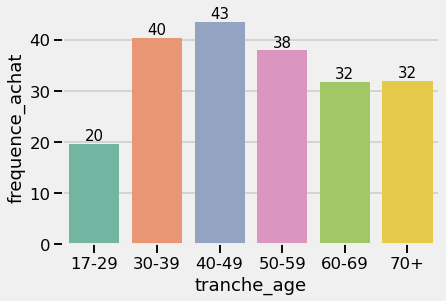

In [76]:
plots = sns.barplot(x='tranche_age',y='frequence_achat', data=frequence_achat1)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
# https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

# Tests

Méthode Anova par Leïla

In [77]:
# 3-Calculons le rapport de corrélation eta carré par ANOVA
X = data2_pan_moy['tranche_age'] # qualitative
Y = data2_pan_moy['taille_panier'] # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.053903443467663556


**Pearson : Relation entre deux variables quantitatives**

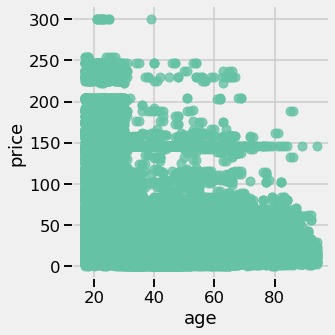

In [78]:
sns.lmplot(x='age',y='price',data=df_complet)

In [79]:
from scipy import stats
stats.pearsonr(df_complet['birth'], df_complet['price'])
# https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html

(0.20865750726671076, 0.0)

**Khi-2 : Relation entre deux variables qualitatives**

In [80]:
# // Tranche_age & Catégorie
age_categ = pd.crosstab(index=df_complet["tranche_age"], columns=df_complet["categ"], margins=True, normalize='index') 
age_categ.columns = ["categ0","categ1","categ2"]
age_categ.index= ["17-29","30-39","40-49","50-59","60-69",'70+',"total"]
age_categ

from scipy import stats
chi = stats.chi2_contingency(age_categ)
chi
# https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/07_contingency.html

(2.448539998982677,
 0.9983422722952704,
 12,
 array([[0.52111601, 0.41143981, 0.06744419],
        [0.52111601, 0.41143981, 0.06744419],
        [0.52111601, 0.41143981, 0.06744419],
        [0.52111601, 0.41143981, 0.06744419],
        [0.52111601, 0.41143981, 0.06744419],
        [0.52111601, 0.41143981, 0.06744419],
        [0.52111601, 0.41143981, 0.06744419]]))

<AxesSubplot:>

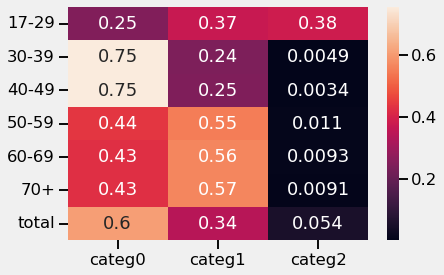

In [81]:
age_categ.drop("total")
sns.heatmap(age_categ[:],annot=True)

On peut conclure ici que la corrélation est très faible et que les deux variables sont par conséquent indépendantes

# Informations supplémentaires

**Top clients**

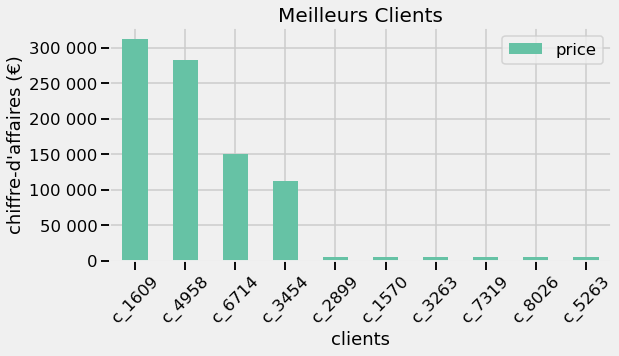

In [82]:
top_clients = df_complet.groupby('client_id')[['price']].sum().sort_values(by='price', ascending=False).head(10)
top_clients.plot(kind='bar', figsize=(8,4))
plt.xlabel('clients')
plt.ylabel('chiffre-d\'affaires (€)')
plt.xticks(rotation=45)
#plt.tick_params(axis='both', which='major', rotation=45) # vient du module style
plt.title("Meilleurs Clients", fontsize=20)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)).replace(",", " ")))
# https://stackoverflow.com/questions/25973581/how-do-i-format-axis-number-format-to-thousands-with-a-comma-in-matplotlib
# https://stackoverflow.com/questions/69525296/how-do-i-format-axis-number-format-to-thousands-with-a-whitespace-in-matplotlib

In [83]:
les_4 =top_clients['price'].head(4).sum()
print ('Les 4 premiers clients apportent à eux-seuls un chiffre-d\'affaires de €', '{:,}'.format(round(les_4)).replace(',',' ')
       ,'... Il s\'agit certainement de professionnels')

Les 4 premiers clients apportent à eux-seuls un chiffre-d'affaires de € 857 078 ... Il s'agit certainement de professionnels


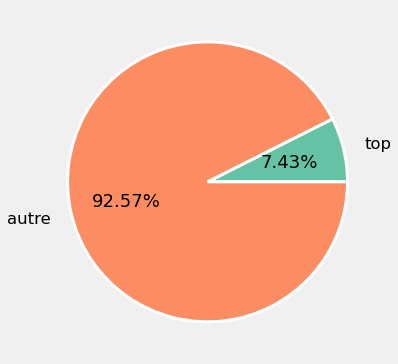

In [86]:
# Exécuter la cellule une deuxième fois pour faire apparaître le diagramme
top_clients = top_clients.head(4).sum()
autres_clients = df_complet['price'].sum() - top_clients

values = [top_clients, autres_clients]
names = ['top','autre']

plt.figure(figsize=(7,6))
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops= {'linewidth' : 3, 'edgecolor' : 'white'},
        normalize = True, autopct = lambda x: str(round(x, 2))+ '%')
plt.show()
# La top-clientèle représente presque un dixième du chiffre-d'affaires

La top-clientèle représente presque **un dixième** du chiffre-d'affaires

Pearsons correlation: 0.209
0.61 R²
P_value :0.0000000000000000000000000


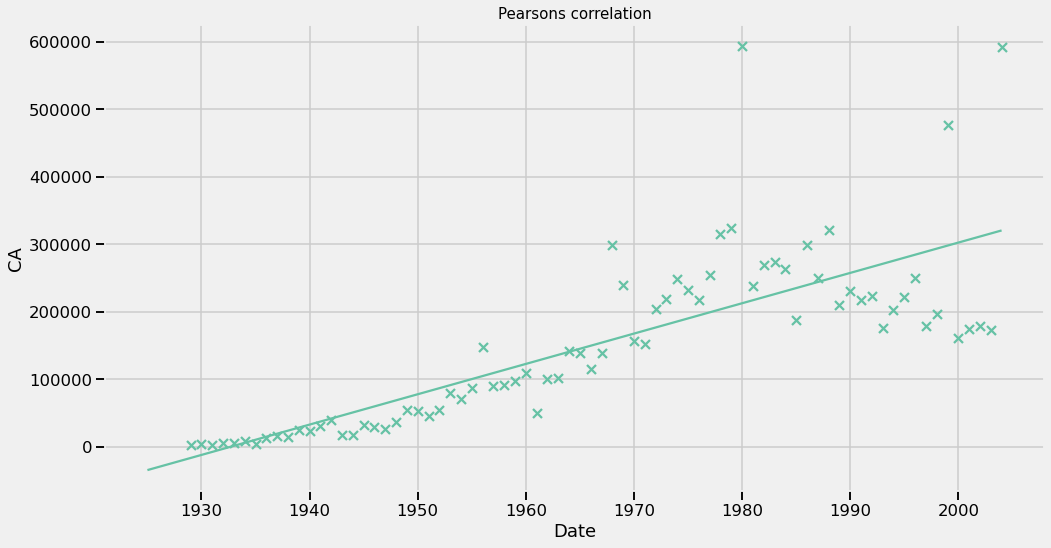

In [87]:
import statsmodels.api as sm
from scipy.stats import pearsonr
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

list1 = df_complet['birth']
list2 = df_complet['price']
  
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

pearson_corre = df_complet[['birth', 'price']]
pearsonsum = pearson_corre.groupby('birth', as_index = False)
pearsonsum = pearsonsum.price.sum()

Y = pearsonsum['price'] # quantitative
X = pearsonsum[['birth']] # qualitative
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() 
a,b = result.params['birth'],result.params['intercept']

x = pearsonsum.birth
y = pearsonsum.price
pearson = scipy.stats.linregress(x, y)
print(round((pearson.rvalue*pearson.rvalue),2), 'R²')

# P-valeur
slope, intercept, r, p, stderr = scipy.stats.linregress(df_complet['birth'],df_complet['price'])
print('P_value :%.25f' % p)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots(figsize= (15,8))
ax.scatter(pearsonsum.birth, pearsonsum.price, marker='x')
plt.plot(np.arange(1925,2005),[a*x+b for x in np.arange(1925,2005)])
ax.set_ylabel('CA')
ax.set_xlabel('Date')
plt.title('Pearsons correlation', fontsize = 15)
plt.show()